In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay


# Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning

### 1. Load and Inspect: Load the telecom_churn.csv dataset. 

In [153]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [154]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2. Initial Cleaning: 
### ○ The TotalCharges column is loaded as an object type due to some non-numeric entries and has missing values. Investigate and convert it to a numeric type, deciding on a strategy to handle any errors that arise during conversion. 
### ○ Identify all columns with missing values and analyze the extent of the missing data. """

In [155]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [157]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [158]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [159]:
df.drop(columns = ["customerID"] , inplace = True)

In [160]:
df.duplicated().sum()

np.int64(22)

In [161]:
df.drop_duplicates(inplace = True)

In [162]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [163]:
df.shape

(7021, 20)

In [164]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [165]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [166]:
df.shape

(7021, 20)

(np.float64(0.9583220586626408), <Axes: >)

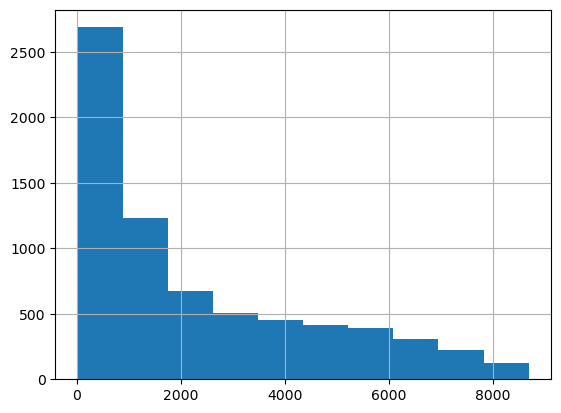

In [167]:
df["TotalCharges"].skew() , df["TotalCharges"].hist()

### Create insightful visualizations to understand the relationships between features and the Churn target. 
### ○ Generate at least one plot showing the distribution of a numerical feature for churned vs. non-churned customers 
### (e.g., a histogram or KDE plot). 

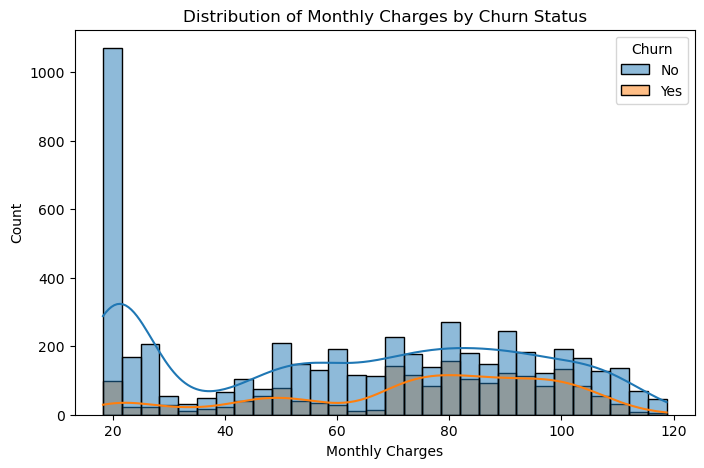

In [168]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", kde=True, bins=30)
plt.title("Distribution of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.show()

### ○ Generate at least one plot showing the relationship between a categorical feature and churn (e.g., a count plot). 
### ○ Summarize your key findings from the EDA in a markdown cell. 

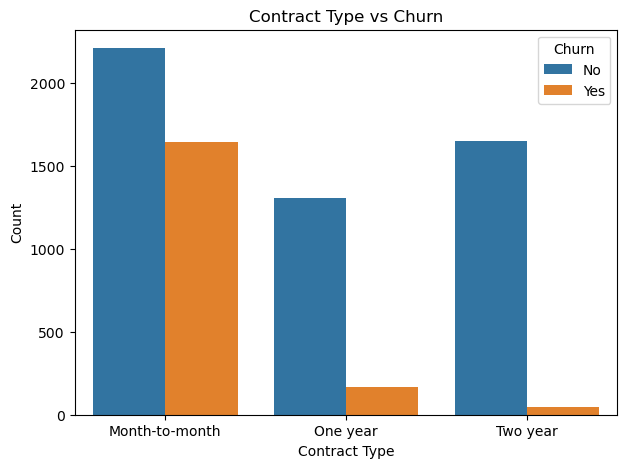

In [169]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

### ○ Summarize your key findings from the EDA in a markdown cell. 

##### --> Most of the data is clean, with only a few missing values in the TotalCharges column, mostly for new customers with zero tenure.

##### --> Customers who pay higher monthly charges are more likely to leave, while those with lower charges tend to stay. Contract type also matters a lot: people on month-to-month plans churn the most, whereas long-term contracts (one year or two years) keep customers more loyal.

##### --> Overall, churn seems to be driven by financial pressure and contract flexibility. Since churners make up a smaller portion of the dataset, we’ll need to address this class imbalance when building models.

# Task 2: Feature Engineering

### Create at least two new, meaningful features from the existing data.Justify why you believe these features might improve model performance.

In [170]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [172]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

In [173]:
df[num_features].corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015349,0.219434,0.101642
tenure,0.015349,1.000000,0.245251,0.825293
MonthlyCharges,0.219434,0.245251,1.000000,0.650540
TotalCharges,0.101642,0.825293,0.650540,1.000000


In [174]:
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'].replace(0,1))

In [175]:
df['CostEfficiency'] = df['TotalCharges'] / (df['MonthlyCharges'].replace(0,1))

In [176]:
df.drop(columns = ['tenure','TotalCharges','MonthlyCharges'], inplace = True)

In [177]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,AvgMonthlySpend,CostEfficiency
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,29.850000,1.000000
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,55.573529,33.178227
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,54.075000,2.008357
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,40.905556,43.516548
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,75.825000,2.144979


In [178]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn',
       'AvgMonthlySpend', 'CostEfficiency'],
      dtype='object')

In [179]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [180]:
df.shape

(7021, 19)

(np.float64(0.23930232625412542), <Axes: >)

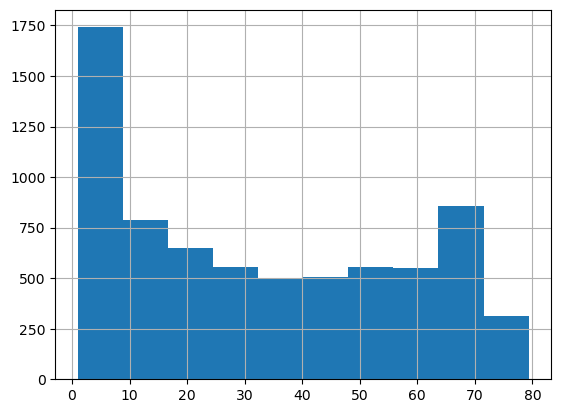

In [181]:
df["CostEfficiency"].skew() , df["CostEfficiency"].hist()

(np.float64(-0.2146804309252933), <Axes: >)

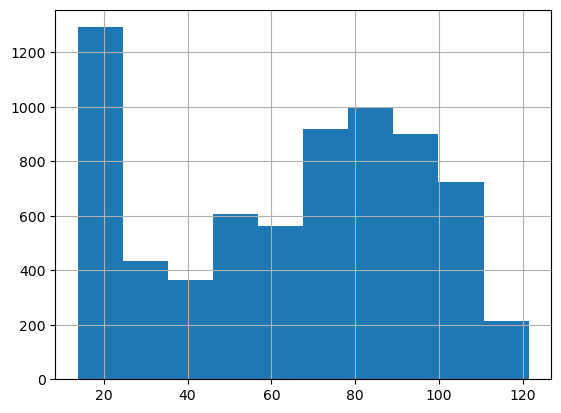

In [182]:
df["AvgMonthlySpend"].skew() , df["AvgMonthlySpend"].hist() 

<Axes: ylabel='AvgMonthlySpend'>

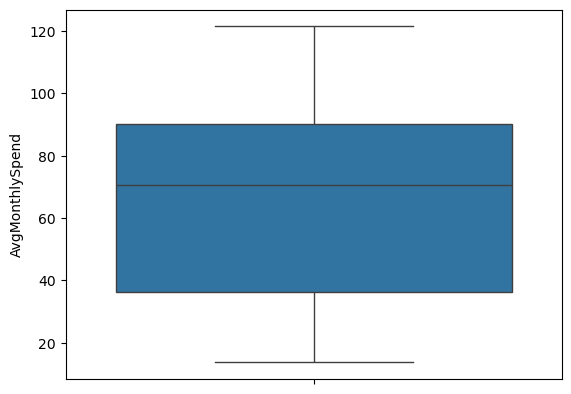

In [183]:
sns.boxplot(df["AvgMonthlySpend"])

<Axes: ylabel='CostEfficiency'>

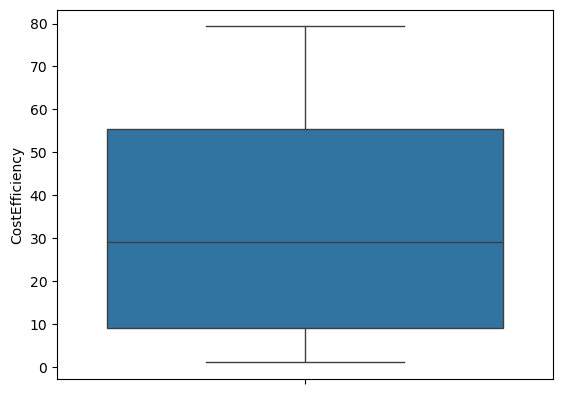

In [184]:
sns.boxplot(df["CostEfficiency"])

In [185]:
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']

df['NumServices'] = (df[service_cols] != 'No').sum(axis=1)
df['HasMultipleServices'] = (df['NumServices'] > 3).astype(int)

In [186]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,AvgMonthlySpend,CostEfficiency,NumServices,HasMultipleServices
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,No,29.850000,1.000000,3,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,No,55.573529,33.178227,4,1
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,Yes,54.075000,2.008357,4,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),No,40.905556,43.516548,5,1
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,Yes,75.825000,2.144979,2,0


In [187]:
df.drop(columns = ['PhoneService', 'MultipleLines', 'InternetService', 
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies'] , inplace = True)

In [188]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Contract,PaperlessBilling,PaymentMethod,Churn,AvgMonthlySpend,CostEfficiency,NumServices,HasMultipleServices
0,Female,0,Yes,No,Month-to-month,Yes,Electronic check,No,29.850000,1.000000,3,0
1,Male,0,No,No,One year,No,Mailed check,No,55.573529,33.178227,4,1
2,Male,0,No,No,Month-to-month,Yes,Mailed check,Yes,54.075000,2.008357,4,1
3,Male,0,No,No,One year,No,Bank transfer (automatic),No,40.905556,43.516548,5,1
4,Female,0,No,No,Month-to-month,Yes,Electronic check,Yes,75.825000,2.144979,2,0


In [189]:
df.shape

(7021, 12)

# Task 3: Building the End-to-End Pipeline

In [190]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,Contract,PaperlessBilling,PaymentMethod,Churn,AvgMonthlySpend,CostEfficiency,NumServices,HasMultipleServices
0,Female,0,Yes,No,Month-to-month,Yes,Electronic check,No,29.850000,1.000000,3,0
1,Male,0,No,No,One year,No,Mailed check,No,55.573529,33.178227,4,1
2,Male,0,No,No,Month-to-month,Yes,Mailed check,Yes,54.075000,2.008357,4,1
3,Male,0,No,No,One year,No,Bank transfer (automatic),No,40.905556,43.516548,5,1
4,Female,0,No,No,Month-to-month,Yes,Electronic check,Yes,75.825000,2.144979,2,0


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               7021 non-null   object 
 1   SeniorCitizen        7021 non-null   int64  
 2   Partner              7021 non-null   object 
 3   Dependents           7021 non-null   object 
 4   Contract             7021 non-null   object 
 5   PaperlessBilling     7021 non-null   object 
 6   PaymentMethod        7021 non-null   object 
 7   Churn                7021 non-null   object 
 8   AvgMonthlySpend      7010 non-null   float64
 9   CostEfficiency       7010 non-null   float64
 10  NumServices          7021 non-null   int64  
 11  HasMultipleServices  7021 non-null   int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 713.1+ KB


In [192]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [255]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [256]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns
num_features, cat_features

(Index(['SeniorCitizen', 'AvgMonthlySpend', 'CostEfficiency', 'NumServices',
        'HasMultipleServices'],
       dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling',
        'PaymentMethod'],
       dtype='object'))

In [257]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [258]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

for name , clf in models.items():
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier',clf)])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"classification report for {name}")
    print(classification_report(y_test, y_pred))

classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.70      1405
weighted avg       0.79      0.74      0.75      1405

classification report for Random Forest
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.47      0.53       372

    accuracy                           0.78      1405
   macro avg       0.72      0.68      0.69      1405
weighted avg       0.77      0.78      0.77      1405

classification report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       372

    accuracy                           0.79      140

In [259]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[934,  99],
       [190, 182]])

<Axes: >

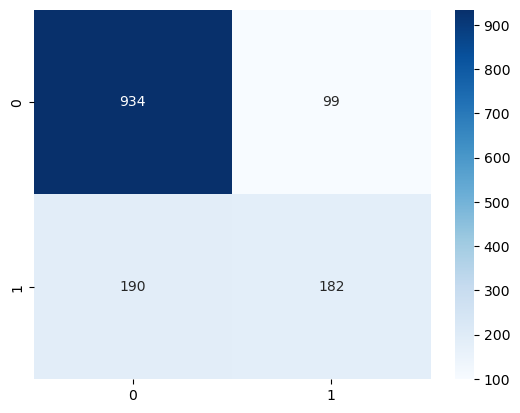

In [260]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [267]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ]
)

for name , clf in models.items():
    imbpipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier',clf)])

    imbpipeline.fit(X_train, y_train)
    y_pred = imbpipeline.predict(X_test)
    print(f"classification report for {name}")
    print(classification_report(y_test, y_pred))

classification report for Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1033
           1       0.51      0.76      0.61       372

    accuracy                           0.74      1405
   macro avg       0.70      0.75      0.71      1405
weighted avg       0.79      0.74      0.75      1405

classification report for Random Forest
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1033
           1       0.55      0.58      0.56       372

    accuracy                           0.76      1405
   macro avg       0.70      0.70      0.70      1405
weighted avg       0.77      0.76      0.76      1405

classification report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1033
           1       0.55      0.71      0.62       372

    accuracy                           0.77      140

In [263]:
y_pred = imbpipeline.predict(X_test)

# Task 4: Model Selection and Hyperparameter Tuning

In [266]:
param_grid_gb = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7]
}

gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

grid_search_gb = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid_gb,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1
)

grid_search_gb.fit(X_train, y_train)

print("Best Hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validation F1-weighted:", grid_search_gb.best_score_)

y_pred_gb = grid_search_gb.predict(X_test)
from sklearn.metrics import f1_score
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

from sklearn.metrics import classification_report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))


Best Hyperparameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Best Cross-Validation F1-weighted: 0.7913048049974032
Test F1-weighted: 0.7843125542344395

Classification Report on Test Data:
              precision    recall  f1-score   support

    No Churn       0.83      0.90      0.87      1033
       Churn       0.65      0.49      0.56       372

    accuracy                           0.79      1405
   macro avg       0.74      0.70      0.71      1405
weighted avg       0.78      0.79      0.78      1405



# Task 5: Handling Class Imbalance

#### 1. Implement a Strategy: Choose one of the following methods and integrate it into your modeling process: 
#### ○ Class Weighting: Use the class_weight='balanced' parameter in your chosen classifier. 
#### ○ Resampling: Use a library like imbalanced-learn to apply a resampling technique (e.g., SMOTE for oversampling or RandomUnderSampler for undersampling) to the training data. This should be added as a step in your final Pipeline.

In [268]:
param_grid_gb = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__learning_rate": [0.01, 0.1, 0.2],
    "classifier__max_depth": [3, 5, 7]
}

gb_pipeline = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

grid_search_gb = GridSearchCV(
    estimator=gb_pipeline,
    param_grid=param_grid_gb,
    scoring="f1_weighted",
    cv=5,
    n_jobs=-1
)

grid_search_gb.fit(X_train, y_train)

print("Best Hyperparameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Cross-Validation F1-weighted:", grid_search_gb.best_score_)

y_pred_gb = grid_search_gb.predict(X_test)
from sklearn.metrics import f1_score
print("Test F1-weighted:", f1_score(y_test, y_pred_gb, average="weighted"))

from sklearn.metrics import classification_report
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_gb, target_names=["No Churn", "Churn"]))


Best Hyperparameters for Gradient Boosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}
Best Cross-Validation F1-weighted: 0.7826530738643112
Test F1-weighted: 0.7829872207303504

Classification Report on Test Data:
              precision    recall  f1-score   support

    No Churn       0.88      0.81      0.84      1033
       Churn       0.56      0.69      0.62       372

    accuracy                           0.78      1405
   macro avg       0.72      0.75      0.73      1405
weighted avg       0.79      0.78      0.78      1405



#### 2. Compare and Conclude: Compare the model's performance with and without the imbalance-handling strategy. Does it improve the results? Explain why or why not. 

- Yes, imbalance handling improves performance for churn prediction, especially in recall (catching actual churners).
- This is important in business: Missing a churner (false negative) is more costly than wrongly flagging a loyal customer (false positive).
- The best choice depends on trade-offs:
- If you want balanced precision/recall → SMOTE or balanced class weights.
- If you want maximum recall (don’t miss churners) → use class weights.

# Task 6: Final Evaluation and Interpretation

### 1. Test Set Evaluation: Evaluate your final, tuned pipeline (with the imbalance handling) on the held-out test set. 
### 2. Metrics Report: Report the following metrics: Precision, Recall, F1-Score, and the ROC AUC score. Also, display the Classification Report and Confusion Matrix. 

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1033
           1       0.56      0.69      0.62       372

    accuracy                           0.78      1405
   macro avg       0.72      0.75      0.73      1405
weighted avg       0.79      0.78      0.78      1405

ROC-AUC Score: 0.8339110431044354


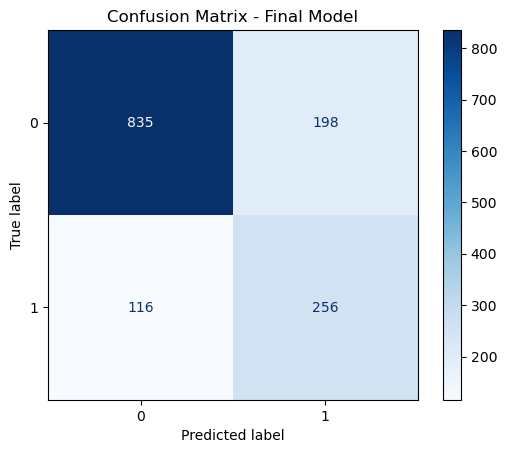

In [272]:
y_pred = grid_search_gb.predict(X_test)
y_prob = grid_search_gb.predict_proba(X_test)[:,1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search_gb.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Final Model")
plt.show()

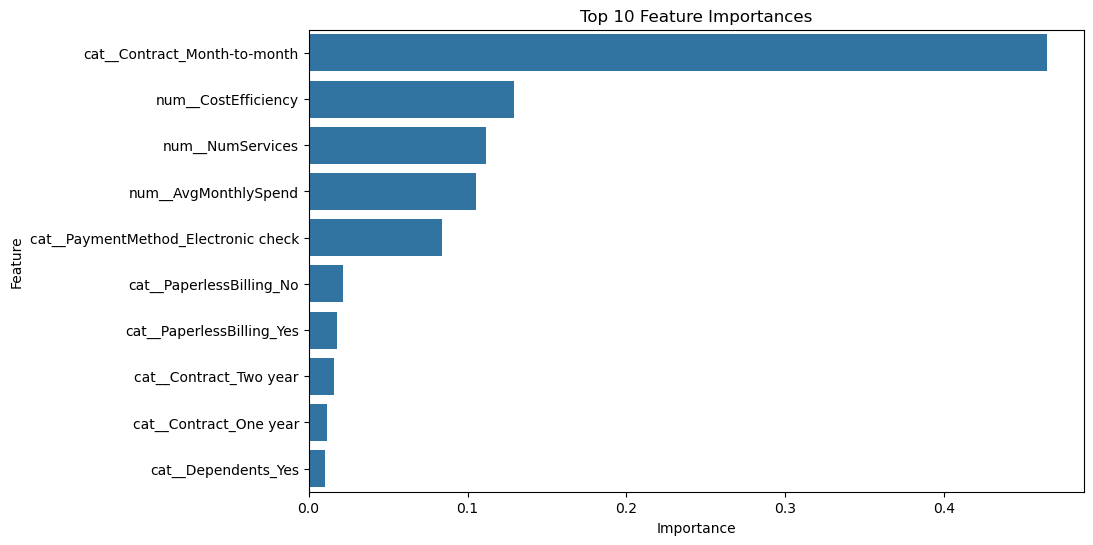

In [275]:
clf = imbpipeline.named_steps["classifier"]
importances = clf.feature_importances_
feature_names = imbpipeline.named_steps["preprocessor"].get_feature_names_out()
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp.head(10), x="Importance", y="Feature")
plt.title("Top 10 Feature Importances")
plt.show()


### 3. Interpretation: 
### ○ Analyze the confusion matrix. In the context of customer churn, what is the business cost of a False Positive versus a False Negative? Which one is worse? 
### ○ If your final model was a tree-based ensemble (like Random Forest or Gradient Boosting), extract and visualize the top 10 most important features. Discuss what these features tell you about the main drivers of customer churn.

### Final Evaluation and Interpretation

#### 1. Confusion Matrix Analysis
- *True Negatives (835):* Customers correctly predicted as *not churning*.  
- *True Positives (256):* Customers correctly predicted as *churning*.  
- *False Positives (198):* Customers predicted to churn but actually stayed.  
- *False Negatives (116):* Customers predicted to stay but actually churned.  

*Business Cost of Errors:*
- *False Positives (FP):* The company might spend money offering discounts/incentives to customers who would not have churned anyway. This increases marketing cost but doesn’t lose revenue.  
- *False Negatives (FN):* The company fails to identify actual churners, leading to lost customers, revenue loss, and potentially negative brand reputation.  
- *Which is worse?* → *False Negatives* are more damaging from a business perspective, since losing a customer is costlier than unnecessarily offering an incentive.  

---

#### 2. Feature Importance Analysis
The top 10 most important features from the final Random Forest model are:  
1. *Contract_Month-to-month* – Short-term contract customers are far more likely to churn.  
2. *CostEfficiency (engineered feature)* – Customers who perceive lower value (high cost vs. low usage) churn more often.  
3. *NumServices (engineered feature)* – Customers using fewer services (e.g., no TV, no internet bundle) are more likely to leave.  
4. *AvgMonthlySpend* – Higher spending customers have a higher probability of churn.  
5. *PaymentMethod_Electronic check* – Customers paying with electronic checks show higher churn (possibly due to dissatisfaction with billing).  
6. *PaperlessBilling* – Mixed influence: electronic billing might be correlated with more transient, tech-savvy customers.  
7. *Contract_Two year* – Customers on long contracts are much less likely to churn.  
8. *Contract_One year* – One-year contracts also reduce churn compared to month-to-month.  

*Interpretation:*  
- *Contract Type* is the strongest churn driver → customers on month-to-month contracts are the riskiest group.  
- *Cost-related features (Monthly Charges, Avg Spend, Cost Efficiency)* strongly impact churn → high bills = higher risk.  
- *Payment Method* matters → electronic check customers churn more, possibly due to inconvenience or trust issues.  
- *Engagement with multiple services* reduces churn → bundled service users are stickier.  

---

### Key Takeaways 
- *Target high-risk groups*: Month-to-month, high-spending customers, and electronic check payers.  
- *Retention strategies*: Offer discounts or contract upgrades to high-risk segments before they leave.  
- *Product bundling*: Encourage customers to subscribe to multiple services, increasing stickiness.  
- *Payment incentives*: Promote auto-pay or credit card billing to reduce churn linked with electronic checks.